<a href="https://colab.research.google.com/github/ElenaVillano/sentiment_analysis_tweets/blob/main/notebooks/modelado_ejemplo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install "git+https://github.com/ElenaVillano/sentiment_analysis_tweets.git#egg=nlptweet&subdirectory=src" --quiet

In [ ]:
#!pip uninstall nlptweet

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import nltk
#import re
import timeit
import string
# Nuestro paquete
import nlp


#call the nltk downloader
nltk.download('punkt')

from dateutil import parser

# Carga un set de stopwords predefinidas
from nltk.corpus import stopwords

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [158]:
# Nombramiento de columnas
col_names = ['target', # Polaridad del twet 0=negativo, 2=neutral, 4=positivo
             'ids',    # ID tweet
             'date',   # Fecha y hora del tweet
             'flag',   # QUERY
             'user',   # Usuario del tweet
             'text']   # Texto del tweety

# Carga y limpieza de datos

In [154]:
# Requiered to select a file to be imported into colab
# Not useful if running locally
from google.colab import files
uploaded = files.upload()

Saving testdata_manual_2009_06_14.csv to testdata_manual_2009_06_14.csv


In [159]:
test_data =  pd.read_csv('testdata_manual_2009_06_14.csv',
                 encoding='latin-1', names=col_names)

In [21]:
data =  pd.read_csv('1600000_datos_limpios_sin_user_ni_url.csv',
                 encoding='latin-1')

In [22]:
print(data.shape)

(1600000, 8)


In [23]:
data.head(10)

,Unnamed: 0,target,ids,date,flag,user,text,raw_text
0,0,0,1467810369,mon apr 06 22:19:45 pdt 2009,no_query,_thespecialone_,aww bummer shoulda got david carr third day,"@switchfoot http://twitpic.com/2y1zl - awww, t..."
1,1,0,1467810672,mon apr 06 22:19:49 pdt 2009,no_query,scotthamilton,upset updat facebook text might cri result sch...,is upset that he can't update his facebook by ...
2,2,0,1467810917,mon apr 06 22:19:53 pdt 2009,no_query,mattycus,dive mani time ball manag save 50 % rest go bo...,@kenichan i dived many times for the ball. man...
3,3,0,1467811184,mon apr 06 22:19:57 pdt 2009,no_query,ellectf,whole bodi feel itchi like fire,my whole body feels itchy and like its on fire
4,4,0,1467811193,mon apr 06 22:19:57 pdt 2009,no_query,karoli,behav mad see,"@nationwideclass no, it's not behaving at all...."
5,5,0,1467811372,mon apr 06 22:20:00 pdt 2009,no_query,joy_wolf,whole crew,@kwesidei not the whole crew
6,6,0,1467811592,mon apr 06 22:20:03 pdt 2009,no_query,mybirch,need hug,need a hug
7,7,0,1467811594,mon apr 06 22:20:03 pdt 2009,no_query,cozz,hey long time see ye rain bit bit lol fine thank,@loltrish hey long time no see! yes.. rains a...
8,8,0,1467811795,mon apr 06 22:20:05 pdt 2009,no_query,2hood4hollywood,nope,@tatiana_k nope they didn't have it
9,9,0,1467812025,mon apr 06 22:20:09 pdt 2009,no_query,mimismo,que muera,@twittera que me muera ?


In [24]:
data = data[data.text.notna()]

## Tokenizer

In [25]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import regularizers

In [26]:
# Entrena un Tokenizer. Consiste en:
# Crea un diccionario numerado de las palabras existentes en el corpus, y devuelve
# por cada palabra, el número entero de su índice en el diccionario.
# En este caso, considera las N palabras más frecuentes.
# oov_token = constante asiganda para palabras fuera del vocabulario (NOT USED HERE)
data_set_1 = data
data_set_1.shape
data_set_1.text

0               aww bummer shoulda got david carr third day 
1          upset updat facebook text might cri result sch...
2          dive mani time ball manag save 50 % rest go bo...
3                           whole bodi feel itchi like fire 
4                                             behav mad see 
                                 ...                        
1599995                          woke school best feel ever 
1599996              thewdbcom cool hear old walt interview 
1599997                        readi mojo makeov ask detail 
1599998     happi 38th birthday boo time tupac amaru shakur 
1599999                                               happi 
Name: text, Length: 1591506, dtype: object

In [27]:
max_words = 1000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data_set_1.text)

In [28]:
palabras = pd.DataFrame([(word,count) for i, (word, count) in enumerate(tokenizer.word_counts.items())])

In [29]:
palabras = palabras.sort_values(1,ascending=False).reset_index()[2:]

In [52]:
palabras_mas_frecuentes = palabras.head(1000)

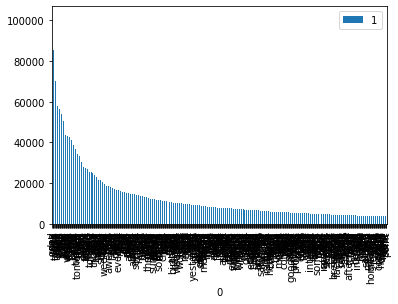

In [31]:
palabras_mas_frecuentes.plot.bar(x=0,y=1)

In [38]:
palabras_mas_frecuentes

,index,0,1
2,7,day,101871
3,188,good,92467
4,164,work,85412
5,33,like,83062
6,100,love,81877
...,...,...,...
497,1821,water,3670
498,1079,bout,3663
499,690,star,3655
500,1647,store,3652


In [53]:
hola=str(palabras_mas_frecuentes[0])

In [49]:
from wordcloud import WordCloud

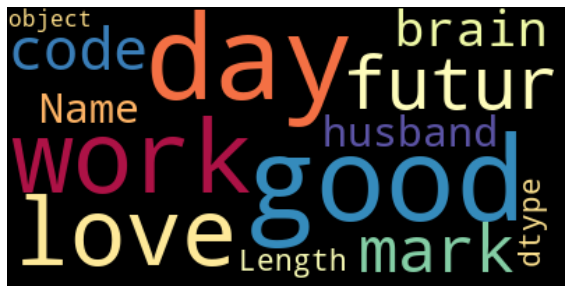

In [54]:
wordclouds = WordCloud(max_words=500, background_color="black",colormap="Spectral").generate(hola)
plt.figure(figsize=(10, 10))
plt.imshow(wordclouds, interpolation="bilinear")
plt.axis("off")
plt.show()

In [32]:
print("Number of words in the dictionary", len(tokenizer.word_index))
print(list(tokenizer.word_index.items())[:10])

Number of words in the dictionary 330671
[('go', 1), ('get', 2), ('day', 3), ('good', 4), ('work', 5), ('like', 6), ('love', 7), ('got', 8), ('today', 9), ('time', 10)]


In [55]:
# Convierte palabras en enteros
sequences = tokenizer.texts_to_sequences(data_set_1.text)
lengths = []
for seq in sequences:
  lengths.append(len(seq))

print("Tweet más pequeño", np.array(lengths).min(), "words.")
print("Tweet más grande", np.array(lengths).max(), "words.")
print(f"Longitud promedio: {np.array(lengths).mean():.2f} +- {np.array(lengths).std():.2f} words.")
print('\n')

for seq in sequences[:10]:
  print(seq)

Tweet más pequeño 0 words.
Tweet más grande 27 words.
Longitud promedio: 4.96 +- 3.04 words.


[110, 8, 697, 3]
[592, 222, 430, 353, 201, 242, 965, 76, 9, 188]
[221, 10, 860, 686, 495, 344, 1]
[327, 645, 19, 6, 863]
[454, 18]
[327]
[25, 461]
[83, 96, 10, 18, 90, 97, 168, 168, 16, 418, 11]
[656]
[]


In [59]:
tweets[1]

array([592, 222, 430, 353, 201, 242, 965,  76,   9, 188,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

In [60]:
train_seq = np.array(sequences, dtype=object)
df_sequences = pd.DataFrame(train_seq.T, columns=['tokens'])

In [63]:
df_sequences['len'] = df_sequences['tokens'].map(lambda s: len(s))

In [64]:
df_sequences

,tokens,len
0,"[110, 8, 697, 3]",4
1,"[592, 222, 430, 353, 201, 242, 965, 76, 9, 188]",10
2,"[221, 10, 860, 686, 495, 344, 1]",7
3,"[327, 645, 19, 6, 863]",5
4,"[454, 18]",2
...,...,...
1591501,"[248, 76, 103, 19, 149]",5
1591502,"[122, 174, 159, 752]",4
1591503,"[134, 287]",2
1591504,"[53, 183, 296, 10]",4


In [65]:
data = data.reset_index().drop(['index', 'Unnamed: 0'], axis = 1)

,target,ids,date,flag,user,text,raw_text
0,0,1467810369,mon apr 06 22:19:45 pdt 2009,no_query,_thespecialone_,aww bummer shoulda got david carr third day,"@switchfoot http://twitpic.com/2y1zl - awww, t..."
1,0,1467810672,mon apr 06 22:19:49 pdt 2009,no_query,scotthamilton,upset updat facebook text might cri result sch...,is upset that he can't update his facebook by ...
2,0,1467810917,mon apr 06 22:19:53 pdt 2009,no_query,mattycus,dive mani time ball manag save 50 % rest go bo...,@kenichan i dived many times for the ball. man...
3,0,1467811184,mon apr 06 22:19:57 pdt 2009,no_query,ellectf,whole bodi feel itchi like fire,my whole body feels itchy and like its on fire
4,0,1467811193,mon apr 06 22:19:57 pdt 2009,no_query,karoli,behav mad see,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...,...
1591501,1,2193601966,tue jun 16 08:40:49 pdt 2009,no_query,amandamarie1028,woke school best feel ever,just woke up. having no school is the best fee...
1591502,1,2193601969,tue jun 16 08:40:49 pdt 2009,no_query,thewdboards,thewdbcom cool hear old walt interview,thewdb.com - very cool to hear old walt interv...
1591503,1,2193601991,tue jun 16 08:40:49 pdt 2009,no_query,bpbabe,readi mojo makeov ask detail,are you ready for your mojo makeover? ask me f...
1591504,1,2193602064,tue jun 16 08:40:49 pdt 2009,no_query,tinydiamondz,happi 38th birthday boo time tupac amaru shakur,happy 38th birthday to my boo of alll time!!! ...


In [66]:
df_sequences['target'] = data['target']

In [171]:
df_sequences['len'].describe()

count    1.591506e+06
mean     4.962383e+00
std      3.037960e+00
min      0.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      7.000000e+00
max      2.700000e+01
Name: len, dtype: float64

In [177]:
df_sequences['len'].quantile(0.95)

11.0

In [182]:
last_df=df_sequences

In [183]:
max_len = 11
tweets = pad_sequences(list(last_df.tokens), maxlen=max_len, padding='post')
print(tweets)

[[110   8 697 ...   0   0   0]
 [592 222 430 ...   9 188   0]
 [221  10 860 ...   0   0   0]
 ...
 [134 287   0 ...   0   0   0]
 [ 53 183 296 ...   0   0   0]
 [ 53   0   0 ...   0   0   0]]


## Separamos en train, test

In [184]:
from sklearn.model_selection import train_test_split

In [185]:
X_train, X_test, y_train, y_test = train_test_split(tweets, last_df.target.values, test_size=0.3, random_state=23042021)

In [186]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (1114054, 11)
y_train (1114054,)
X_test (477452, 11)
y_test (477452,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


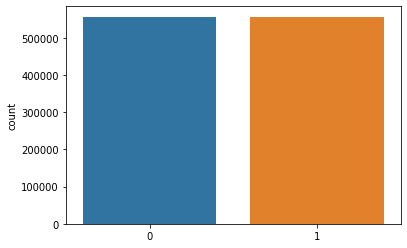

In [187]:
sns.countplot(y_train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


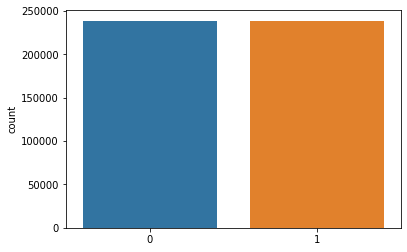

In [188]:
sns.countplot(y_test)

# Creamos el modelo

In [189]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.regularizers import l1

In [190]:
# Crea una red con layers Embedding, LSTM, Dense
model = Sequential()
model.add(Embedding(input_length=max_len, input_dim=max_words, output_dim=12, trainable=True))
model.add(LSTM(units=12))
model.add(Dropout(0.5))
model.add(Dense(units=24, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=12, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 11, 12)            12000     
_________________________________________________________________
lstm_4 (LSTM)                (None, 12)                1200      
_________________________________________________________________
dropout_8 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 24)                312       
_________________________________________________________________
dropout_9 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 12)                300       
_________________________________________________________________
dropout_10 (Dropout)         (None, 12)               

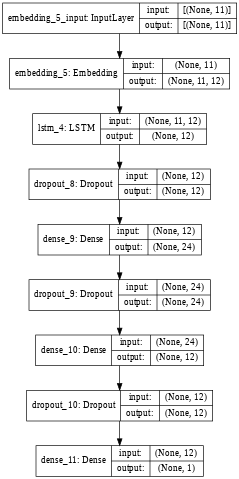

In [191]:
# Plot model
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True,
                          rankdir='TB', expand_nested=True, dpi=48)

In [193]:
# Compile
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), optimizer='adam', 
              metrics=[tf.metrics.BinaryAccuracy(), 'accuracy'])

In [194]:
# Train it
history_1 = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.2)

Epoch 1/20
55703/55703 [==============================] - 273s 5ms/step - loss: 0.5655 - binary_accuracy: 0.7169 - accuracy: 0.7169 - val_loss: 0.5192 - val_binary_accuracy: 0.7475 - val_accuracy: 0.7475
Epoch 2/20
55703/55703 [==============================] - 269s 5ms/step - loss: 0.5367 - binary_accuracy: 0.7410 - accuracy: 0.7410 - val_loss: 0.5068 - val_binary_accuracy: 0.7496 - val_accuracy: 0.7496
Epoch 3/20
55703/55703 [==============================] - 268s 5ms/step - loss: 0.5321 - binary_accuracy: 0.7438 - accuracy: 0.7438 - val_loss: 0.5036 - val_binary_accuracy: 0.7510 - val_accuracy: 0.7510
Epoch 4/20
55703/55703 [==============================] - 267s 5ms/step - loss: 0.5288 - binary_accuracy: 0.7461 - accuracy: 0.7461 - val_loss: 0.5042 - val_binary_accuracy: 0.7508 - val_accuracy: 0.7508
Epoch 5/20
55703/55703 [==============================] - 266s 5ms/step - loss: 0.5266 - binary_accuracy: 0.7473 - accuracy: 0.7473 - val_loss: 0.5080 - val_binary_accuracy: 0.7519 - v

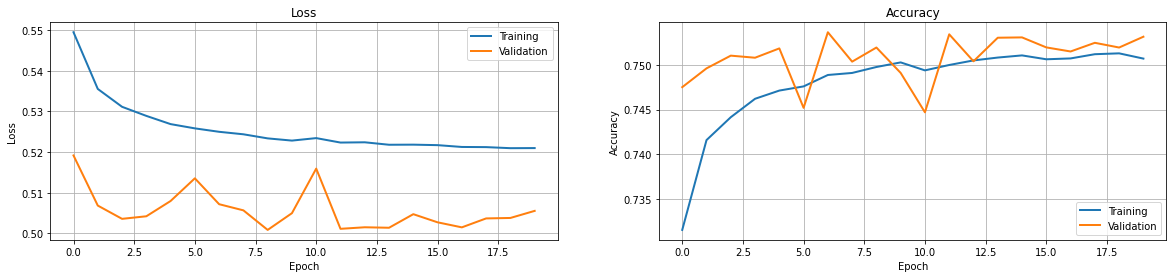

In [195]:
# Plot loss
plt.figure(figsize=(20, 4))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(history_1.history['loss'], label='Training', linewidth=2)
plt.plot(history_1.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(history_1.history['accuracy'], label='Training', linewidth=2)
plt.plot(history_1.history['val_accuracy'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.show()

In [196]:
# Evaluate on test set
model.evaluate(x=X_test, y=y_test)

14921/14921 [==============================] - 35s 2ms/step - loss: 0.5033 - binary_accuracy: 0.7548 - accuracy: 0.7548


[0.5032797455787659, 0.7548067569732666, 0.7548067569732666]

In [197]:
X_test

array([[ 95, 329, 411, ...,   0,   0,   0],
       [  8, 204,  18, ...,   0,   0,   0],
       [248, 131, 424, ...,   0,   0,   0],
       ...,
       [ 43,  56, 310, ...,   0,   0,   0],
       [  8,  30, 277, ...,   0,   0,   0],
       [147,  24,   0, ...,   0,   0,   0]], dtype=int32)

In [230]:
from nlp.preprocessing import convierte_a_minusculas, quitar_caracteres_html, reemplazar_urls, reemplazar_usuarios,\
quitar_hashtag, quitar_RT, quitar_caracteres_especiales, quitar_letras_repetidas, quitar_nonascii, \
separar_abreviaciones, remove_stopwords, oracion_raiz, modificar_etiqueta

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [231]:
data_raw = test_data

In [232]:
data = convierte_a_minusculas(data_raw)
data['text'] = data['text'].map(lambda s: quitar_caracteres_html(s))
data['text'] = data['text'].map(lambda s: reemplazar_urls(s))
data['text'] = data['text'].map(lambda s: reemplazar_usuarios(s))
data['text'] = data['text'].map(lambda s: quitar_hashtag(s))
data['text'] = data['text'].map(lambda s: quitar_RT(s))
data['text'] = data['text'].map(lambda s: quitar_caracteres_especiales(s))
data['text'] = data['text'].map(lambda s: quitar_letras_repetidas(s))
data['text'] = data['text'].map(lambda s: quitar_nonascii(s))
data['text'] = data['text'].map(lambda s: separar_abreviaciones(s))
data['text'] = data['text'].map(lambda s: remove_stopwords(s))
data['text'] = data['text'].map(lambda s: oracion_raiz(s))
data = modificar_etiqueta(data)

In [234]:
data = data[data['target']!=2]

In [242]:
test_data = test_data[test_data['target']!=2]

In [236]:
sequence = tokenizer.texts_to_sequences(data['text'])
test = pad_sequences(sequence, maxlen=max_len)
score = model.predict(test)

In [228]:
pd.set_option('display.max_colwidth', None)

In [237]:
score_1=pd.DataFrame(score, columns=['score'])

In [238]:
score_1

,score
0,0.736462
1,0.727761
2,0.735437
3,0.307716
4,0.639304
...,...
354,0.687031
355,0.075859
356,0.652750
357,0.307411


In [243]:
score_1['predict_label'] = score_1.score.map(lambda s: 'positive' if s>=0.5 else 'negative')
score_1['real_label'] = data['target'].values
score_1['texto'] = data['text'].values
score_1['texto_raw'] = test_data['text'].values

In [244]:
score_1.head(50)

,score,predict_label,real_label,texto,texto_raw
0,0.736462,positive,1,loovve kindle2 dx cool 2 fantast right,"@stellargirl I loooooooovvvvvveee my Kindle2. Not that the DX is cool, but the 2 is fantastic in its own right."
1,0.727761,positive,1,read kindle2 love lee child good read,Reading my kindle2... Love it... Lee childs is good read.
2,0.735437,positive,1,ok first asses fuck rock,"Ok, first assesment of the #kindle2 ...it fucking rocks!!!"
3,0.307716,negative,1,love kindle2 mine month never look back new big one huge need remors,@kenburbary You'll love your Kindle2. I've had mine for a few months and never looked back. The new big one is huge! No need for remorse! :)
4,0.639304,positive,1,fair enough kindle2 think perfect,@mikefish Fair enough. But i have the Kindle2 and I think it's perfect :)
5,0.746922,positive,1,big quit happi kindle2,@richardebaker no. it is too big. I'm quite happy with the Kindle2.
6,0.291230,negative,0,fuck economi hate aig non loan given ass,Fuck this economy. I hate aig and their non loan given asses.
7,0.729119,positive,1,jqueri new best friend,Jquery is my new best friend.
8,0.670386,positive,1,love twitter,Loves twitter
9,0.717908,positive,1,love obama make joke,how can you not love Obama? he makes jokes about himself.


In [245]:
score_1['ground_truth'] = score_1.real_label.map(lambda s: 'positive' if s==1 else 'negative')

In [247]:
score_1[score_1['predict_label']!=score_1['ground_truth']]

,score,predict_label,real_label,texto,texto_raw,ground_truth
3,0.307716,negative,1,love kindle2 mine month never look back new big one huge need remors,@kenburbary You'll love your Kindle2. I've had mine for a few months and never looked back. The new big one is huge! No need for remorse! :),positive
11,0.324423,negative,1,hous correspond dinner last night whoopi barbara sherri went obama got stand ovat,"House Correspondents dinner was last night whoopi, barbara &amp; sherri went, Obama got a standing ovation",positive
14,0.363422,negative,1,best athlet gener time basketbal relat want get intersport debat __1/2,"#lebron best athlete of our generation, if not all time (basketball related) I don't want to get into inter-sport debates about __1/2",positive
21,0.257727,negative,1,lebron beast nobodi nba come even close,@wordwhizkid Lebron is a beast... nobody in the NBA comes even close.,positive
22,0.263483,negative,1,download app iphon much fun liter app anyth,downloading apps for my iphone! So much fun :-) There literally is an app for just about anything.,positive
...,...,...,...,...,...,...
344,0.198552,negative,1,dad ny day ate mesa grill last night met bobbi flay much fun except complet lost voic today,"My dad was in NY for a day, we ate at MESA grill last night and met Bobby Flay. So much fun, except I completely lost my voice today.",positive
345,0.595264,positive,0,fight latex,Fighting with LaTex. Again...,negative
348,0.647808,positive,0,shit hit fan irancrazi inde,Shit's hitting the fan in Iran...craziness indeed #iranelection,negative
349,0.745758,positive,0,monday alreadi iran may implod kitchen disast seem happi nice weekend great whoop,Monday already. Iran may implode. Kitchen is a disaster. @annagoss seems happy. @sebulous had a nice weekend and @goldpanda is great. whoop.,negative


In [ ]:
from tensorflow.keras.models import save_model, load_model
save_model(model, "./")